# 1. Command Classification
## Problem Statement
#### Create a python script or module to map a user’s command to a set of pre-defined commands
#### Input: A textual command (user input) in varied formats.
#### Output: A standard command mapped to one of the predefined commands.
## Our Goal:
#### High accuracy in classification.
#### Flexibility for future updates.
#### Minimized latency for real-time applications.

## Building semantic text classification model

#### We will use TF-IDF for vectorizing the commands.
#### Apply a ML model SVM for classification.
#### We will use fuzzywuzzy.
#### Evaluate the our model using precision, recall, and accuracy metrics.

In [2]:
!pip3 install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from fuzzywuzzy import process
# It povides fuzzy matching for fallback predictions.

# We will define standard commands
# A list of 14 standard commands that the system should recognize
COMMANDS = [
    "activate do not disturb",
    "deactivate do not disturb",
    "decline the call",
    "pick up the call",
    "play the music",
    "pause the music",
    "play the next song",
    "play the previous song",
    "increase the volume",
    "decrease the volume",
    "increase the brightness",
    "decrease the brightness",
    "start the vehicle",
    "stop the vehicle",
]


In [18]:
# Training data
variants = {
    "activate do not disturb": [
        "Please turn on do not disturb mode",
        "I need some peace and quiet, enable do not disturb",
        "Set my status to do not disturb",
        "Activate do not disturb feature",
        "Put me in do not disturb mode",
    ],
    "deactivate do not disturb": [
        "Turn off do not disturb",
        "Disable do not disturb mode",
        "End do not disturb for me",
        "Cancel do not disturb",
    ],
    "decline the call": [
        "Reject the incoming call",
        "Send the caller to voicemail",
        "Ignore the ringing phone",
        "Don't answer this call",
    ],
    "pick up the call": [
        "Answer the call",
        "Accept the incoming call",
        "Let me talk to the person calling",
    ],
    "play the music": [
        "Start playing songs",
        "Kick off the music playlist",
        "Activate music playback",
    ],
    "pause the music": [
        "Stop the music for now",
        "Temporarily halt playback",
        "Suspend the current song",
    ],
    "play the next song": [
        "Skip ahead to the next track",
        "Advance to the upcoming song",
        "Proceed to play the next song in line",
    ],
    "play the previous song": [
        "Go back to the prior song",
        "Rewind to the preceding track",
        "Replay the last song again",
    ],
    "increase the volume": [
        "Turn it up",
        "Make it louder",
        "Boost the audio level",
    ],
    "decrease the volume": [
        "Turn it down",
        "Lower the volume",
        "Reduce the audio output",
    ],
    "increase the brightness": [
        "Turn up the brightness",
        "Boost the luminance",
    ],
    "decrease the brightness": [
        "Turn down the brightness",
        "Dim the brightness",
    ],
    "start the vehicle": [
        "Turn on the engine",
        "Fire up the vehicle",
    ],
    "stop the vehicle": [
        "Shut off the engine",
        "Power down the vehicle",
    ],
}

In [19]:
# Prepare data for training
X, y = [], []
for command, phrases in variants.items():
    X.extend(phrases)
    y.extend([command] * len(phrases))

In [20]:
# Build classification pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LinearSVC()),
])

In [21]:
# Train the model
model.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [22]:
# Prediction function
def predict_command(user_input):
    # Predict with the model
    prediction = model.predict([user_input])[0]
    # Fallback with fuzzy matching
    if prediction not in COMMANDS:
        prediction, _ = process.extractOne(user_input, COMMANDS)
    return prediction

### User Input: Please boost the audio level
### Predicted Command: increase the volume

In [23]:
# Test the system
test_input = "Please boost the audio level"
print("User Input:", test_input)
print("Predicted Command:", predict_command(test_input))

User Input: Please boost the audio level
Predicted Command: increase the volume


### Evaluation of our model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                            precision    recall  f1-score   support

  activate do not disturb       0.00      0.00      0.00         1
deactivate do not disturb       0.50      1.00      0.67         1
         decline the call       0.00      0.00      0.00         0
      decrease the volume       0.00      0.00      0.00         0
  increase the brightness       0.00      0.00      0.00         0
      increase the volume       0.00      0.00      0.00         2
          pause the music       0.00      0.00      0.00         1
         pick up the call       0.00      0.00      0.00         1
           play the music       0.00      0.00      0.00         0
       play the next song       0.00      0.00      0.00         0
   play the previous song       0.00      0.00      0.00         2
        start the vehicle       0.00      0.00      0.00         1
         stop the vehicle       0.00      0.00      0.00         0

                 accuracy           

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

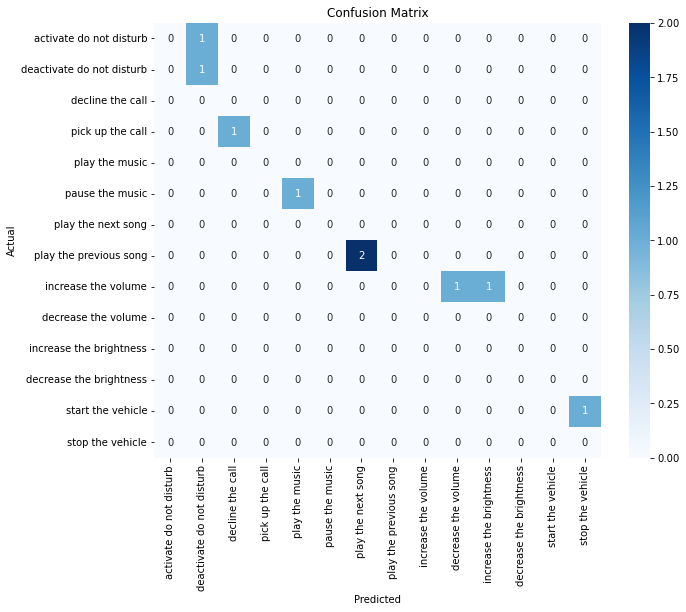

In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=COMMANDS)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=COMMANDS, yticklabels=COMMANDS, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import precision_recall_curve, roc_curve, auc
# import matplotlib.pyplot as plt

# # Binarize the output (one-vs-all for multiclass)
# y_test_binarized = label_binarize(y_test, classes=COMMANDS)
# y_scores = model.decision_function(X_test)  # Get decision function scores

# # Plot precision-recall curve for each class
# plt.figure(figsize=(10, 8))
# for i, command in enumerate(COMMANDS):
#     precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
#     plt.plot(recall, precision, label=f'PR Curve for "{command}"')

# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve (Multiclass)")
# plt.legend(loc="lower left")
# plt.grid()
# plt.show()


In [13]:
from sklearn.svm import SVC

# Replace LinearSVC with SVC
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(probability=True, kernel='linear')),
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear', probability=True))])

In [26]:
# we will Save the Trained Model using Pickle
import pickle

# Save the trained model to a file
with open('command_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)
